In [ ]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt


uploaded_file = 'problems-1.zip' # extracting files from zip

with zipfile.ZipFile(uploaded_file, 'r') as zip_ref:
    zip_ref.extractall('problems-2')


extracted_dir = 'problems-2' # Listing Files in the Extracted Directory

print("Listing all files in the extracted directory:")
for root, dirs, files in os.walk(extracted_dir):
    for filename in files:
        print(os.path.join(root, filename))

def read_csv(csv_path): #Reading and Processing CSV Files
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs




Listing all files in the extracted directory:
problems-2/__MACOSX/problems/._occlusion2_sol.svg
problems-2/__MACOSX/problems/._.DS_Store
problems-2/__MACOSX/problems/._occlusion1.svg
problems-2/problems/occlusion2_rec.svg
problems-2/problems/isolated_sol.csv
problems-2/problems/occlusion2_sol.csv
problems-2/problems/occlusion1_rec.svg
problems-2/problems/.DS_Store
problems-2/problems/occlusion2_sol_rec.png
problems-2/problems/frag01_sol.csv
problems-2/problems/occlusion2_rec.png
problems-2/problems/occlusion1.csv
problems-2/problems/frag01_sol.svg
problems-2/problems/occlusion1_sol.svg
problems-2/problems/frag1.csv
problems-2/problems/frag2.csv
problems-2/problems/isolated.svg
problems-2/problems/frag2_sol.csv
problems-2/problems/occlusion2_sol.svg
problems-2/problems/frag2_sol.svg
problems-2/problems/occlusion2_sol_rec.svg
problems-2/problems/occlusion1_sol_rec.png
problems-2/problems/occlusion1.svg
problems-2/problems/frag0.svg
problems-2/problems/isolated.csv
problems-2/problems/occ

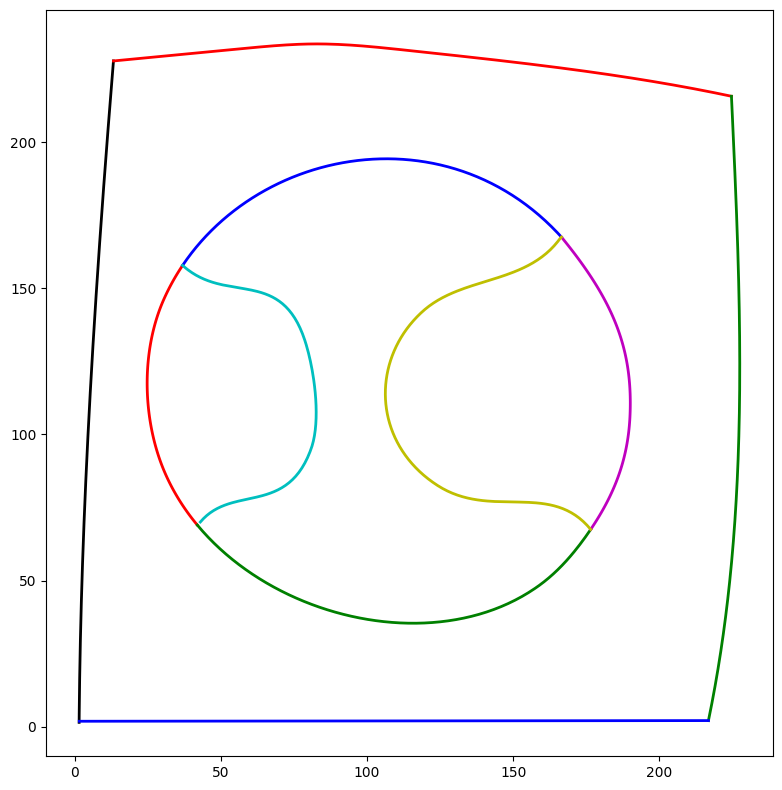

In [ ]:
complex_path = os.path.join(extracted_dir, 'problems/frag0.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

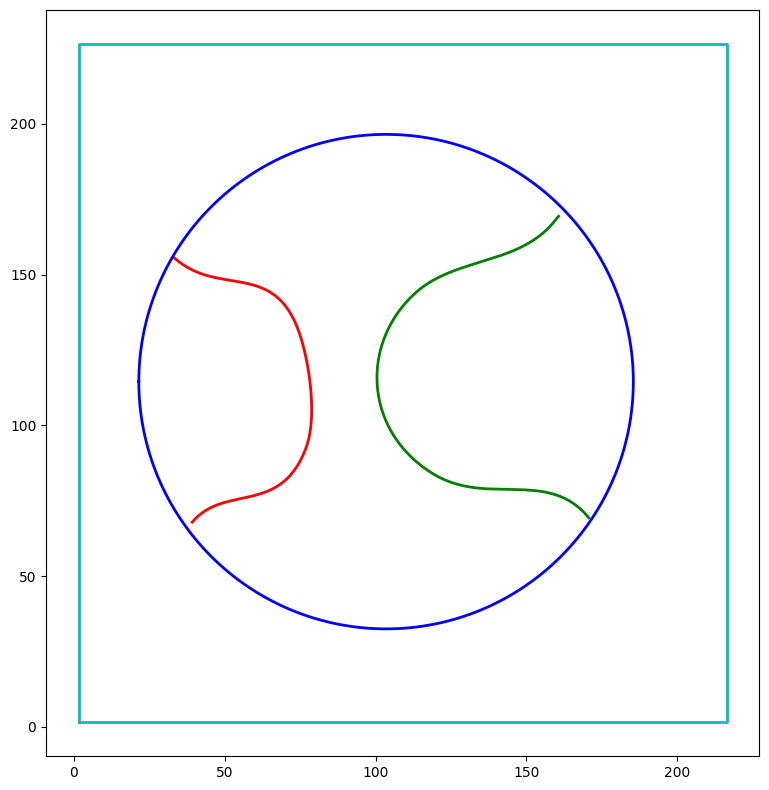

In [ ]:
complex_path = os.path.join(extracted_dir, '/content/problems-2/problems/frag01_sol.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

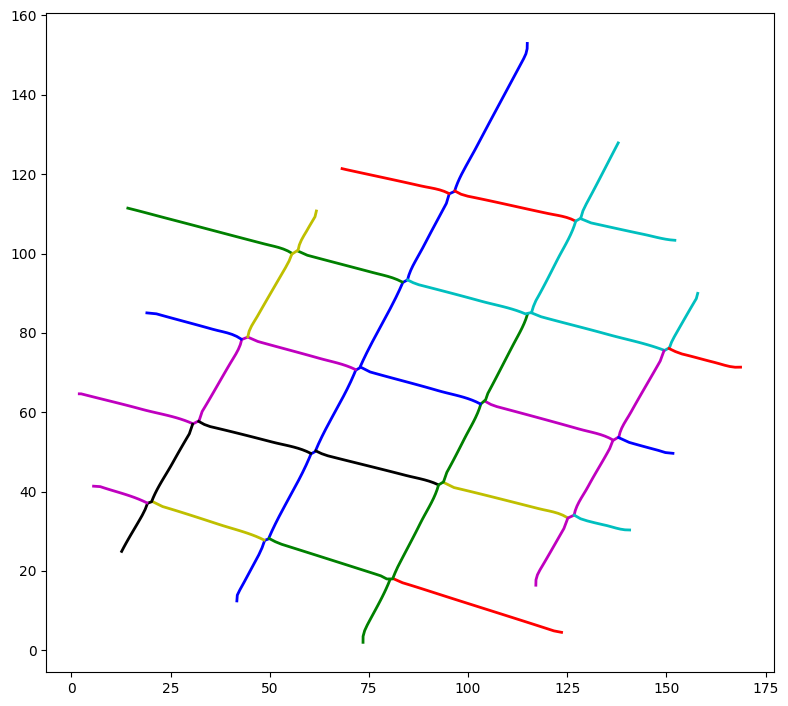

In [ ]:
complex_path = os.path.join(extracted_dir, '/content/problems-2/problems/frag2.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

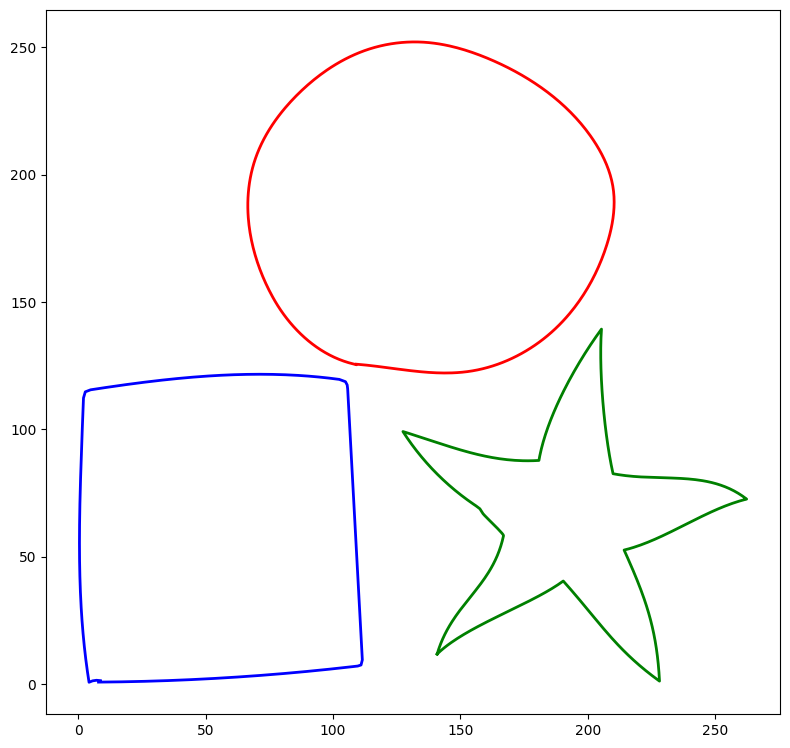

In [ ]:
complex_path = os.path.join(extracted_dir, '/content/problems-2/problems/isolated.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

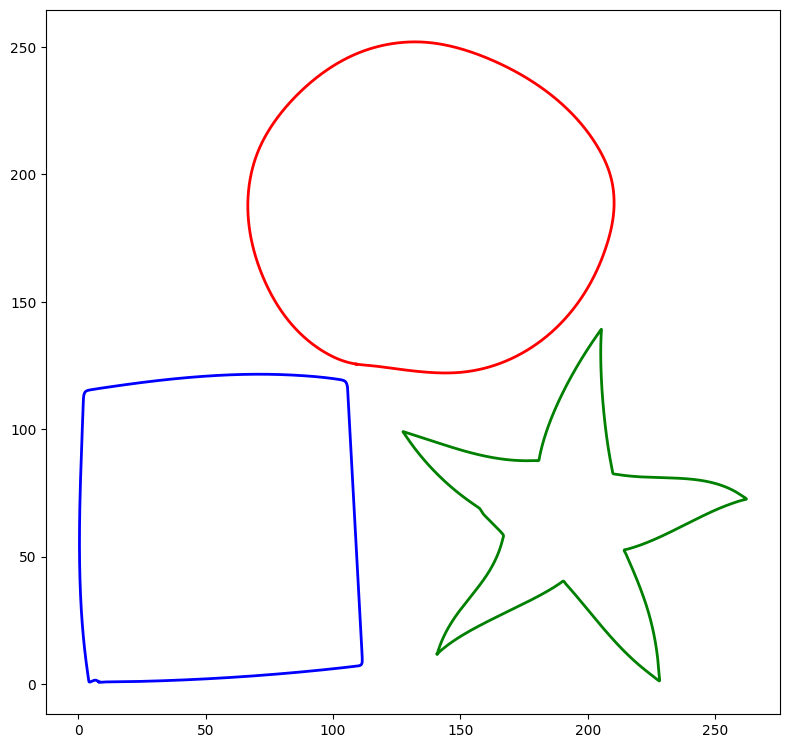

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def read_csv(csv_path):
    """Read CSV file and organize data into a list of paths, each containing multiple polygons."""
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    paths = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        path = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            path.append(XY)
        paths.append(path)
    return paths

def smooth_path(XY, smoothing_factor=0.1):
    """Smooth the path using B-spline interpolation."""
    tck, u = splprep([XY[:, 0], XY[:, 1]], s=smoothing_factor, per=True)
    u_fine = np.linspace(0, 1, len(XY) * 10)
    x_smooth, y_smooth = splev(u_fine, tck)
    return np.column_stack((x_smooth, y_smooth))

def plot_paths(paths_XYs, smoothing_factor=0.1):
    """Plot the paths with smoothing."""
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Colors for different paths
    for i, XYs in enumerate(paths_XYs):
        color = colors[i % len(colors)]
        for XY in XYs:
            XY_smooth = smooth_path(XY, smoothing_factor)
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=1, alpha=0.3)
            ax.plot(XY_smooth[:, 0], XY_smooth[:, 1], color=color, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Path to the CSV file
csv_path = 'isolated.csv'

if os.path.exists(csv_path):
    paths_XYs = read_csv(csv_path)
    plot_paths(paths_XYs)
else:
    print(f"File {csv_path} not found.")

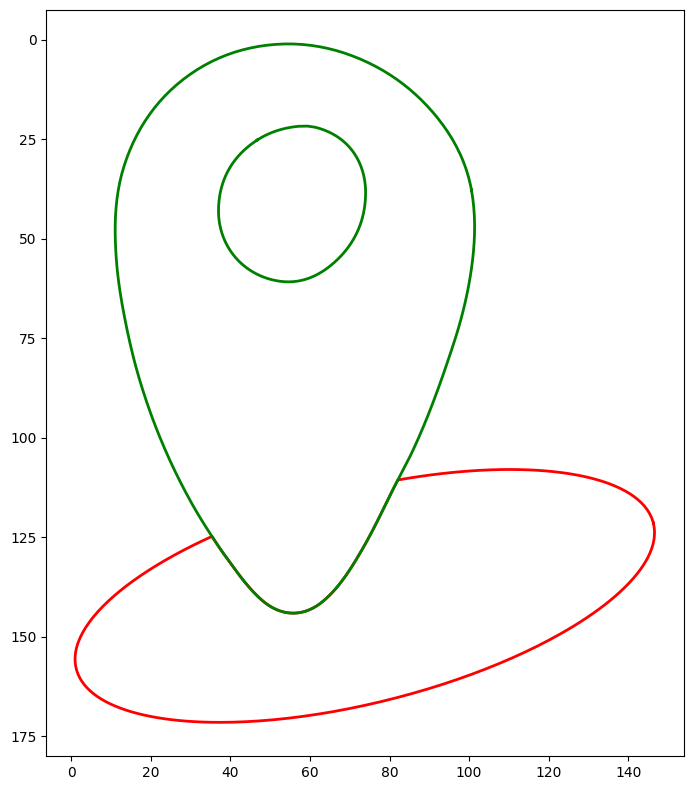

In [ ]:
import os
import matplotlib.pyplot as plt

complex_path = os.path.join(extracted_dir, 'problems/occlusion1.csv')

if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        ax.invert_yaxis()  # Invert the y-axis to flip the image vertically
        plt.show()

    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")


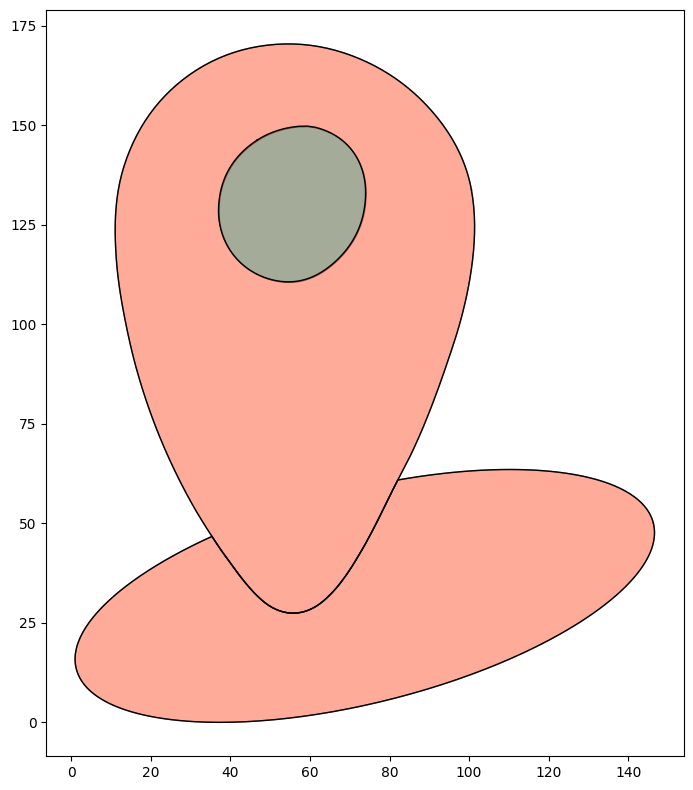

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def calculate_polygon_area(XY):
    x = XY[:, 0]
    y = XY[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


def invert_y_coordinates(XY, y_max):
    XY_inverted = XY.copy()
    XY_inverted[:, 1] = y_max - XY[:, 1]
    return XY_inverted

def plot_with_custom_fill(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    patches_ring = []
    patches_rest = []
    ring_color = '#06FFFF'
    rest_color = '#FF2E00'

    # Determine the maximum y-coordinate for inversion
    y_max = 0
    for XYs in paths_XYs:
        for XY in XYs:
            y_max = max(y_max, np.max(XY[:, 1]))

    for XYs in paths_XYs:
        for XY in XYs:
            # Invert the y-coordinates
            XY_inverted = invert_y_coordinates(XY, y_max)
            ax.plot(XY_inverted[:, 0], XY_inverted[:, 1], c='black', linewidth=1)
            if np.allclose(XY_inverted[0], XY_inverted[-1]):
                area = calculate_polygon_area(XY_inverted)
                polygon = Polygon(XY_inverted, closed=True, edgecolor='black')
                if area > 5000:  # Threshold for distinguishing ring vs rest
                    patches_rest.append(polygon)
                else:
                    patches_ring.append(polygon)


    ring_collection = PatchCollection(patches_ring, facecolor=ring_color, alpha=0.6, edgecolor='black')
    rest_collection = PatchCollection(patches_rest, facecolor=rest_color, alpha=0.4, edgecolor='black')

    ax.add_collection(ring_collection)
    ax.add_collection(rest_collection)
    ax.set_aspect('equal')
    plt.show()


csv_path = 'occlusion1.csv'

if os.path.exists(csv_path):
    paths_XYs = read_csv(csv_path)
    plot_with_custom_fill(paths_XYs)
else:
    print(f"File {csv_path} not found.")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import xml.etree.ElementTree as ET

def read_csv(csv_path):
    """Read CSV file and organize data into a list of paths, each containing multiple polygons."""
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    paths = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        path = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            path.append(XY)
        paths.append(path)
    return paths

def calculate_polygon_area(XY):
    """Calculate the area of a polygon using the Shoelace formula."""
    x = XY[:, 0]
    y = XY[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def invert_y_coordinates(XY, y_max):
    """Invert the y-coordinates for visualization purposes."""
    XY_inverted = XY.copy()
    XY_inverted[:, 1] = y_max - XY[:, 1]
    return XY_inverted



    # Assume SVG elements with 'id' attributes correspond to 'ring' and 'rest' categories
    for element in root.iter():
        if 'id' in element.attrib:
            element_id = element.attrib['id']
            if element_id in colors:
                style = element.attrib.get('style', '')
                for attr in style.split(';'):
                    if 'fill:' in attr:
                        colors[element_id] = attr.split(':')[1].strip()

    return colors

def plot_with_custom_fill(paths, colors, area_threshold=5000):
    """Plot the paths with custom fill colors based on area size."""
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    patches_ring = []
    patches_rest = []

    # Determine the maximum y-coordinate for inversion
    y_max = max(np.max(XY[:, 1]) for path in paths for XY in path)

    for path in paths:
        for XY in path:
            XY_inverted = invert_y_coordinates(XY, y_max)
            ax.plot(XY_inverted[:, 0], XY_inverted[:, 1], c='black', linewidth=1)
            if np.allclose(XY_inverted[0], XY_inverted[-1]):
                area = calculate_polygon_area(XY_inverted)
                polygon = Polygon(XY_inverted, closed=True, edgecolor='black')
                if area > area_threshold:
                    patches_rest.append(polygon)
                else:
                    patches_ring.append(polygon)

    ring_collection = PatchCollection(patches_ring, facecolor=colors['ring'], alpha=0.6, edgecolor='black')
    rest_collection = PatchCollection(patches_rest, facecolor=colors['rest'], alpha=0.4, edgecolor='black')

    ax.add_collection(ring_collection)
    ax.add_collection(rest_collection)
    ax.set_aspect('equal')
    plt.show()

csv_path = 'occlusion1.csv'


if os.path.exists(csv_path) and os.path.exists(svg_path):
    paths = read_csv(csv_path)
    colors = extract_colors_from_svg(svg_path)
    plot_with_custom_fill(paths, colors)
else:
    print(f"File {csv_path} or {svg_path} not found.")


File occlusion1.csv or occlusion1.svg not found.


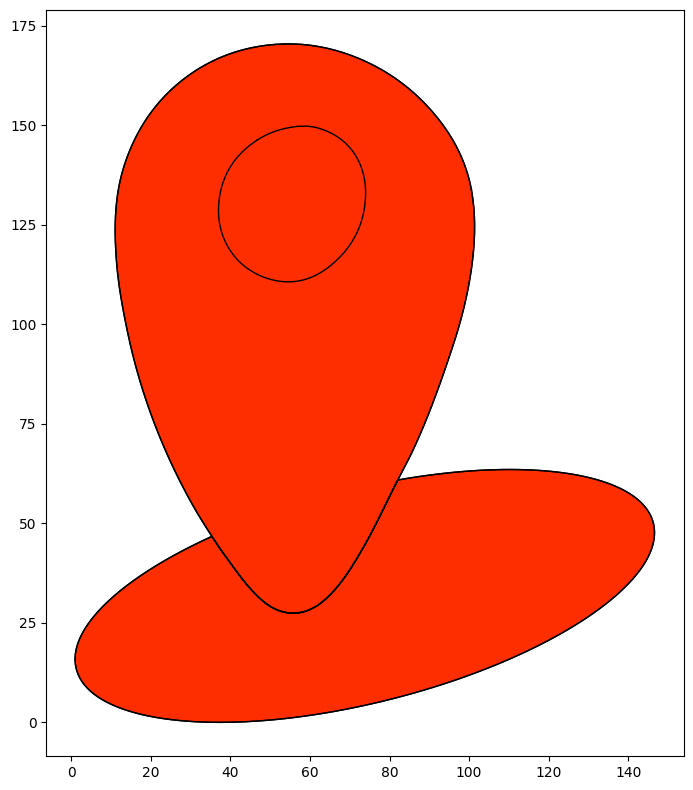

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def calculate_polygon_area(XY):
    x = XY[:, 0]
    y = XY[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


def invert_y_coordinates(XY, y_max):
    XY_inverted = XY.copy()
    XY_inverted[:, 1] = y_max - XY[:, 1]
    return XY_inverted

def plot_with_custom_fill(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    patches_ring = []
    patches_rest = []
    patches_center = []

    ring_color = '#06FFFF'  # Yellow
    rest_color = '#FF2E00'   # Green
    center_color = 'white'

    # Determine the maximum y-coordinate for inversion
    y_max = 0
    for XYs in paths_XYs:
        for XY in XYs:
            y_max = max(y_max, np.max(XY[:, 1]))

    for XYs in paths_XYs:
        for XY in XYs:
            # Invert the y-coordinates
            XY_inverted = invert_y_coordinates(XY, y_max)
            ax.plot(XY_inverted[:, 0], XY_inverted[:, 1], c='black', linewidth=1)
            if np.allclose(XY_inverted[0], XY_inverted[-1]):
                area = calculate_polygon_area(XY_inverted)
                polygon = Polygon(XY_inverted, closed=True, edgecolor='black')
                if area > 5000:  # Threshold for distinguishing ring vs rest
                    patches_rest.append(polygon)
                elif area > 1000:  # Threshold for distinguishing center vs ring
                    patches_ring.append(polygon)
                else:
                    patches_center.append(polygon)


    ring_collection = PatchCollection(patches_ring, facecolor=ring_color, alpha=1, edgecolor='black')
    rest_collection = PatchCollection(patches_rest, facecolor=rest_color, alpha=1, edgecolor='black')
    center_collection = PatchCollection(patches_center, facecolor=center_color, alpha=1, edgecolor='black')

    ax.add_collection(ring_collection)
    ax.add_collection(rest_collection)
    ax.add_collection(center_collection)
    ax.set_aspect('equal')
    plt.show()


csv_path = 'occlusion1.csv'

if os.path.exists(csv_path):
    paths_XYs = read_csv(csv_path)
    plot_with_custom_fill(paths_XYs)
else:
    print(f"File {csv_path} not found.")

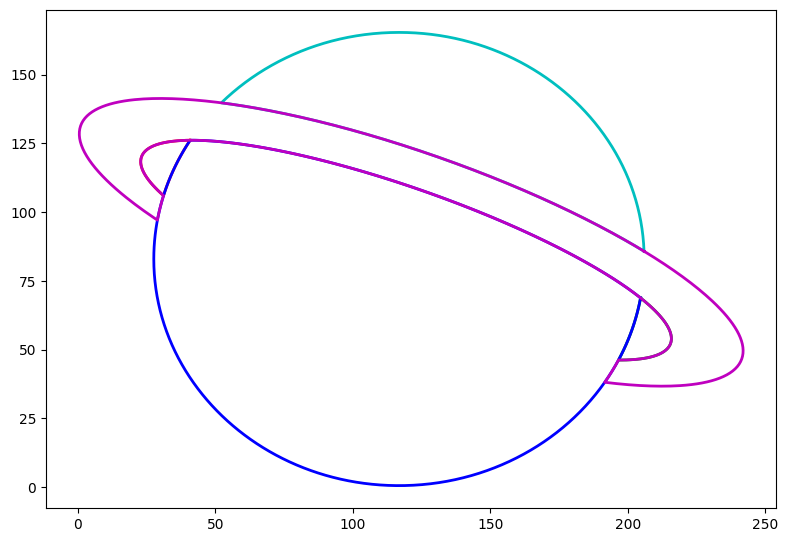

In [ ]:
complex_path = os.path.join(extracted_dir, 'problems/occlusion2.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

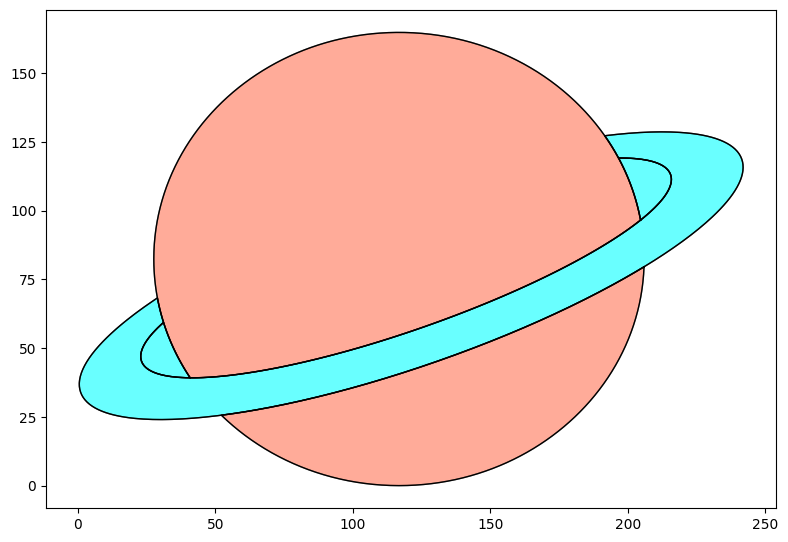

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def calculate_polygon_area(XY):
    x = XY[:, 0]
    y = XY[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))


def invert_y_coordinates(XY, y_max):
    XY_inverted = XY.copy()
    XY_inverted[:, 1] = y_max - XY[:, 1]
    return XY_inverted

def plot_with_custom_fill(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    patches_ring = []
    patches_rest = []
    ring_color = '#06FFFF'  # Blue for the ring
    rest_color = '#FF2E00'  # Orange for the rest

    # Determine the maximum y-coordinate for inversion
    y_max = 0
    for XYs in paths_XYs:
        for XY in XYs:
            y_max = max(y_max, np.max(XY[:, 1]))

    for XYs in paths_XYs:
        for XY in XYs:
            # Invert the y-coordinates
            XY_inverted = invert_y_coordinates(XY, y_max)
            ax.plot(XY_inverted[:, 0], XY_inverted[:, 1], c='black', linewidth=1)
            if np.allclose(XY_inverted[0], XY_inverted[-1]):
                area = calculate_polygon_area(XY_inverted)
                polygon = Polygon(XY_inverted, closed=True, edgecolor='black')
                if area > 5000:  # Threshold for distinguishing ring vs rest
                    patches_rest.append(polygon)
                else:
                    patches_ring.append(polygon)


    ring_collection = PatchCollection(patches_ring, facecolor=ring_color, alpha=0.6, edgecolor='black')
    rest_collection = PatchCollection(patches_rest, facecolor=rest_color, alpha=0.4, edgecolor='black')

    ax.add_collection(ring_collection)
    ax.add_collection(rest_collection)
    ax.set_aspect('equal')
    plt.show()


csv_path = 'occlusion2.csv'

if os.path.exists(csv_path):
    paths_XYs = read_csv(csv_path)
    plot_with_custom_fill(paths_XYs)
else:
    print(f"File {csv_path} not found.")

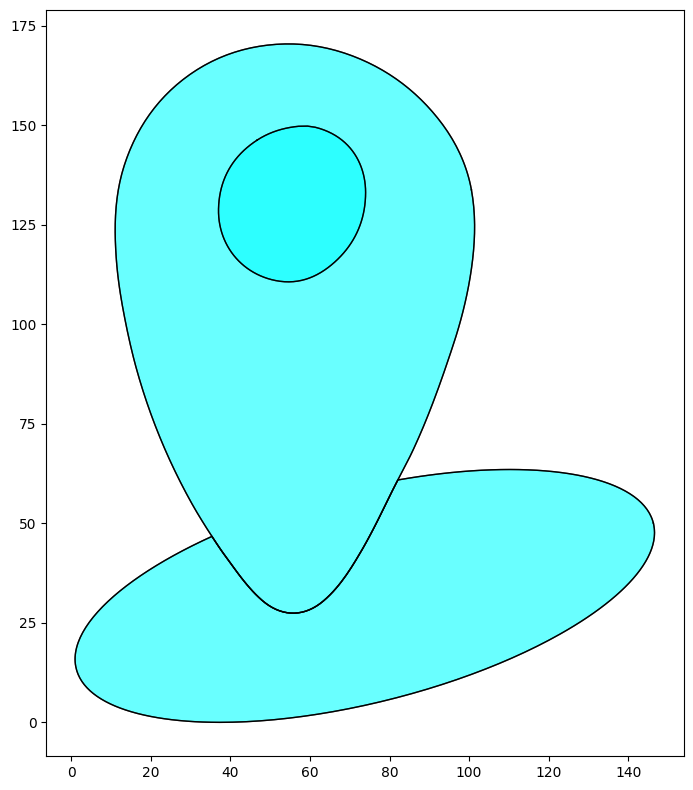

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import xml.etree.ElementTree as ET

def read_csv(csv_path):
    """Read CSV file and organize data into a list of paths, each containing multiple polygons."""
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    paths = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        path = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            path.append(XY)
        paths.append(path)
    return paths

def invert_y_coordinates(XY, y_max):
    """Invert the y-coordinates for visualization purposes."""
    XY_inverted = XY.copy()
    XY_inverted[:, 1] = y_max - XY[:, 1]
    return XY_inverted

def calculate_curvature(XY):
    """Calculate the curvature at each vertex of the polygon."""
    dx = np.gradient(XY[:, 0])
    dy = np.gradient(XY[:, 1])
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    curvature = np.abs(ddx * dy - dx * ddy) / (dx**2 + dy**2)**(3/2)
    return curvature

def classify_polygons_by_curvature(XY):
    """Classify polygons based on the sum of curvature."""
    curvature = calculate_curvature(XY)
    mean_curvature = np.mean(curvature)
    return 'concave' if mean_curvature > 0 else 'convex'

def extract_colors_from_svg(svg_path):
    """Extract colors from SVG file."""
    tree = ET.parse(svg_path)
    root = tree.getroot()
    colors = {
        'concave': '#06FFFF',  # Default color
        'convex': '#FF2E00'   # Default color
    }

    # Assume SVG elements with 'id' attributes correspond to 'concave' and 'convex' categories
    for element in root.iter():
        if 'id' in element.attrib:
            element_id = element.attrib['id']
            if element_id in colors:
                style = element.attrib.get('style', '')
                for attr in style.split(';'):
                    if 'fill:' in attr:
                        colors[element_id] = attr.split(':')[1].strip()

    return colors

def plot_with_curvature_classification(paths, colors):
    """Plot the paths with custom fill colors based on curvature classification."""
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    patches_concave = []
    patches_convex = []

    # Determine the maximum y-coordinate for inversion
    y_max = max(np.max(XY[:, 1]) for path in paths for XY in path)

    for path in paths:
        for XY in path:
            XY_inverted = invert_y_coordinates(XY, y_max)
            ax.plot(XY_inverted[:, 0], XY_inverted[:, 1], c='black', linewidth=1)
            if np.allclose(XY_inverted[0], XY_inverted[-1]):
                classification = classify_polygons_by_curvature(XY_inverted)
                polygon = Polygon(XY_inverted, closed=True, edgecolor='black')
                if classification == 'concave':
                    patches_concave.append(polygon)
                else:
                    patches_convex.append(polygon)

    concave_collection = PatchCollection(patches_concave, facecolor=colors['concave'], alpha=0.6, edgecolor='black')
    convex_collection = PatchCollection(patches_convex, facecolor=colors['convex'], alpha=0.4, edgecolor='black')

    ax.add_collection(concave_collection)
    ax.add_collection(convex_collection)
    ax.set_aspect('equal')
    plt.show()

csv_path = 'occlusion1.csv'
svg_path = 'occlusion1.svg'

if os.path.exists(csv_path) and os.path.exists(svg_path):
    paths = read_csv(csv_path)
    colors = extract_colors_from_svg(svg_path)
    plot_with_curvature_classification(paths, colors)
else:
    print(f"File {csv_path} or {svg_path} not found.")


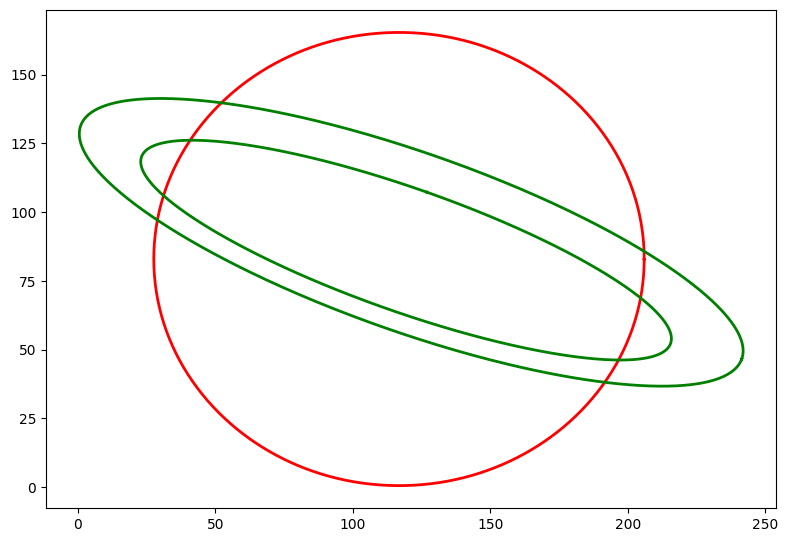

In [ ]:
complex_path = os.path.join(extracted_dir, 'problems/occlusion2_sol.csv')


if os.path.exists(complex_path):
    paths_XYs = read_csv(complex_path)

    def plot(paths_XYs):
        fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
        colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        for i, XYs in enumerate(paths_XYs):
            c = colours[i % len(colours)]
            for XY in XYs:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
        ax.set_aspect('equal')
        plt.show()


    plot(paths_XYs)
else:
    print(f"File {complex_path} not found.")

In [ ]:
pip install opencv-python numpy scipy


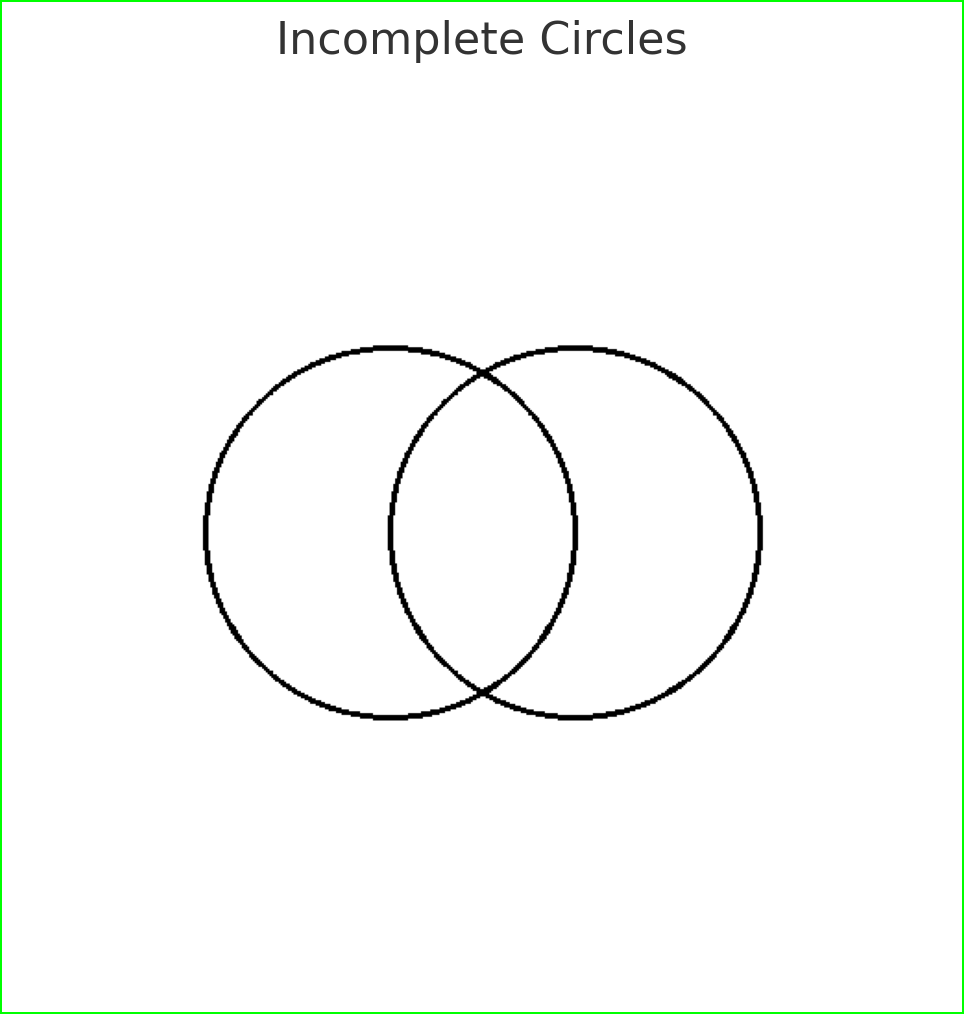

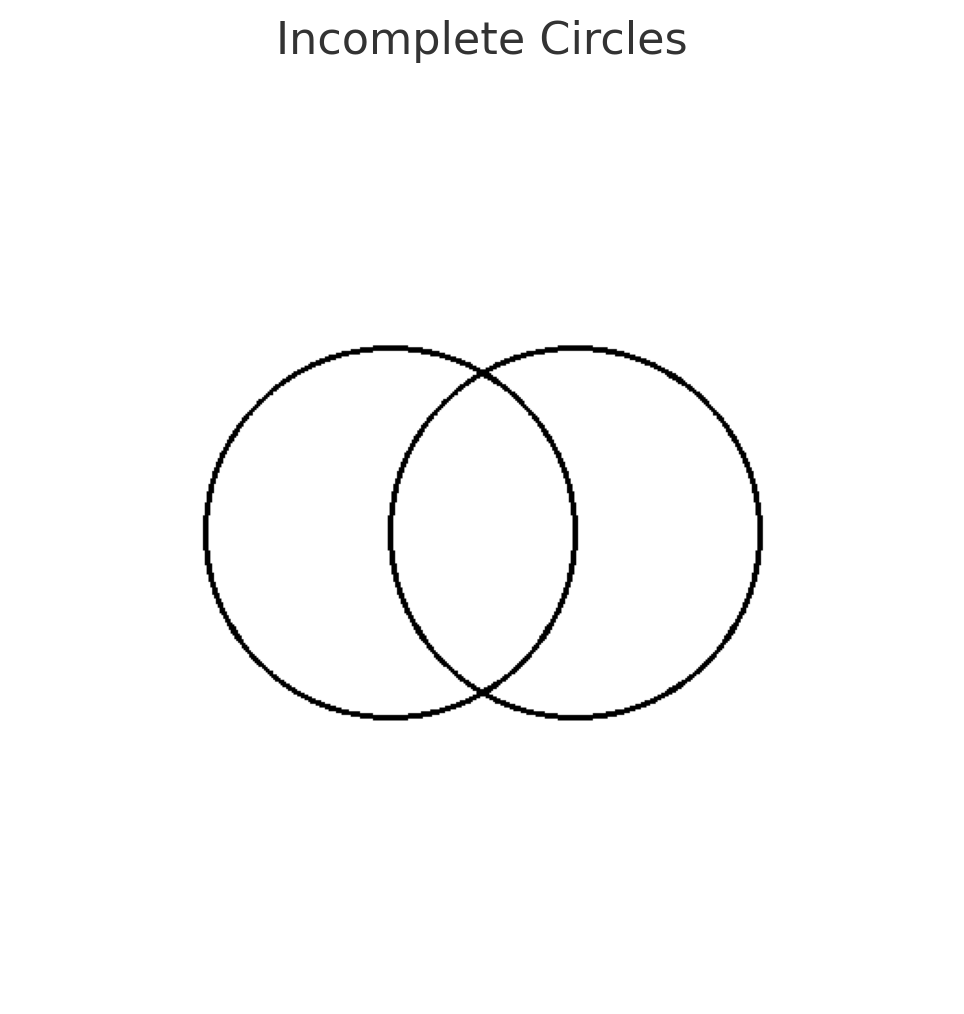

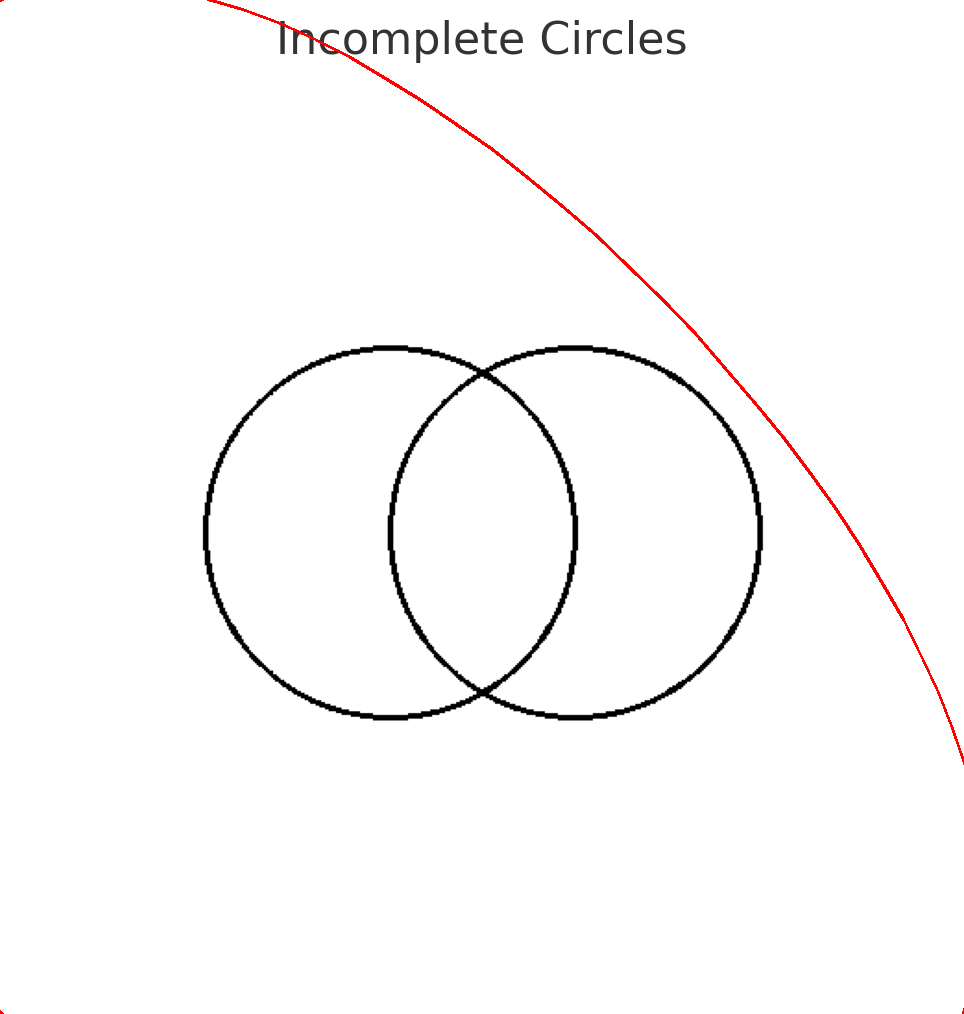

In [ ]:
import cv2
import numpy as np
from scipy.interpolate import splprep, splev
from google.colab.patches import cv2_imshow

def find_contours(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def interpolate_curve(points, num_points=100):
    points = np.array(points)
    # Ensure there are enough points to interpolate
    if len(points) < 3:
        return points
    tck, u = splprep(points.T, s=0, per=1)
    u_new = np.linspace(u.min(), u.max(), num_points)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.vstack((x_new, y_new)).T

def draw_curve(image, curve, color=(0, 255, 0), thickness=2):
    for i in range(len(curve) - 1):
        pt1 = (int(curve[i][0]), int(curve[i][1]))
        pt2 = (int(curve[i + 1][0]), int(curve[i + 1][1]))
        cv2.line(image, pt1, pt2, color, thickness)

def main():
    # Load the input image
    image = cv2.imread('input.png')
    if image is None:
        print("Error: Could not load the image.")
        return
    original_image = image.copy()
    # Find contours
    contours = find_contours(image)
    if not contours:
        print("No contours found.")
        return
    # Visualize the found contours
    contour_img = original_image.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
    cv2_imshow(contour_img)
    # Iterate over each contour
    for contour in contours:
        # Approximate the contour
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        # Interpolate the curve
        interpolated_curve = interpolate_curve(approx[:, 0, :])
        # Draw the original and interpolated curves
        draw_curve(image, interpolated_curve, color=(0, 0, 255))
    # Display the results
    cv2_imshow(original_image)
    cv2_imshow(image)

if __name__ == '__main__':
    main()
